<a href="https://colab.research.google.com/github/VaishaliGudipudi/CBM/blob/main/final_ml_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://docs.google.com/presentation/d/1VX0e0B5qDz0iL_3YAPfmSnKgfzgYPvId/edit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split

In [ ]:
#import io
#%cd "C:\Users\G VAISHALI\Desktop\ML PRJ"

In [ ]:
ndata=pd.read_csv("data.txt",delim_whitespace=True, header=None)

In [ ]:
ndata.columns=['lever_position', 'ship_speed', 'gt_shaft', 'gt_rate', 'gg_rate', 'sp_torque', 'pp_torque',
                     'hpt_temp', 'gt_c_i_temp', 'gt_c_o_temp', 'hpt_pressure', 'gt_c_i_pressure', 'gt_c_o_pressure',
                     'gt_exhaust_pressure', 'turbine_inj_ctrl', 'fuel_flow', 'gt_c_decay_coef',  'gt_t_decay_coef']

In [ ]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3629 entries, 0 to 3628
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lever_position       3629 non-null   float64
 1   ship_speed           3629 non-null   float64
 2   gt_shaft             3629 non-null   float64
 3   gt_rate              3629 non-null   float64
 4   gg_rate              3629 non-null   float64
 5   sp_torque            3629 non-null   float64
 6   pp_torque            3628 non-null   float64
 7   hpt_temp             3628 non-null   float64
 8   gt_c_i_temp          3628 non-null   float64
 9   gt_c_o_temp          3628 non-null   float64
 10  hpt_pressure         3628 non-null   float64
 11  gt_c_i_pressure      3628 non-null   float64
 12  gt_c_o_pressure      3628 non-null   float64
 13  gt_exhaust_pressure  3628 non-null   float64
 14  turbine_inj_ctrl     3628 non-null   float64
 15  fuel_flow            3628 non-null   f

In [ ]:
ndata.isnull().sum().sort_values(ascending=False)
# isnull() - to identify missing values or NA
# sum() - total missing values
# sort_values(ascending=False) - sort in descending order

gt_c_o_temp            1
hpt_pressure           1
gt_c_decay_coef        1
fuel_flow              1
turbine_inj_ctrl       1
gt_exhaust_pressure    1
gt_c_o_pressure        1
gt_c_i_pressure        1
gt_t_decay_coef        1
gt_c_i_temp            1
hpt_temp               1
pp_torque              1
ship_speed             0
sp_torque              0
gg_rate                0
gt_rate                0
gt_shaft               0
lever_position         0
dtype: int64

In [ ]:
ndata.shape

(3629, 18)

In [ ]:
ndata.head()

,lever_position,ship_speed,gt_shaft,gt_rate,gg_rate,sp_torque,pp_torque,hpt_temp,gt_c_i_temp,gt_c_o_temp,hpt_pressure,gt_c_i_pressure,gt_c_o_pressure,gt_exhaust_pressure,turbine_inj_ctrl,fuel_flow,gt_c_decay_coef,gt_t_decay_coef
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [ ]:
ndata.tail()

,lever_position,ship_speed,gt_shaft,gt_rate,gg_rate,sp_torque,pp_torque,hpt_temp,gt_c_i_temp,gt_c_o_temp,hpt_pressure,gt_c_i_pressure,gt_c_o_pressure,gt_exhaust_pressure,turbine_inj_ctrl,fuel_flow,gt_c_decay_coef,gt_t_decay_coef
3624,7.148,21.0,38985.982,2678.077,9131.030,332.257,332.257,832.080,288.0,693.133,2.966,0.998,15.523,1.035,44.365,0.878,0.965,0.987
3625,8.206,24.0,50994.798,3087.539,9314.004,438.086,438.086,929.453,288.0,734.952,3.577,0.998,18.429,1.041,60.682,1.201,0.965,0.987
3626,9.300,27.0,72771.580,3560.417,9770.526,645.054,645.054,1087.653,288.0,781.840,4.502,0.998,22.581,1.050,90.108,1.784,0.965,0.987
3627,1.138,3.0,3489.903,1417.070,6724.777,11.508,11.508,543.146,288.0,563.318,1.226,0.998,6.595,1.019,0.000,0.174,0.965,0.988
3628,2.088,6.0,2858.521,1360.197,6817.164,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ndata.describe()

,lever_position,ship_speed,gt_shaft,gt_rate,gg_rate,sp_torque,pp_torque,hpt_temp,gt_c_i_temp,gt_c_o_temp,hpt_pressure,gt_c_i_pressure,gt_c_o_pressure,gt_exhaust_pressure,turbine_inj_ctrl,fuel_flow,gt_c_decay_coef,gt_t_decay_coef
count,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3628.000000,3628.000000,3628.0,3628.000000,3628.000000,3.628000e+03,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000,3628.000000
mean,5.164708,14.994213,27178.804557,2133.799355,8224.268641,226.876676,226.938660,744.934013,288.0,650.464222,2.342614,9.980000e-01,12.248574,1.029037,35.079382,0.672437,0.957260,0.987291
std,2.627264,7.748900,22215.476917,776.288471,1082.374536,200.875800,200.868778,178.693019,0.0,73.929271,1.081005,2.220752e-16,5.319804,0.010157,25.441195,0.514454,0.004481,0.007497
min,1.138000,3.000000,253.547000,1307.675000,6638.753000,2.000000,5.304000,446.949000,288.0,544.681000,1.093000,9.980000e-01,5.829000,1.019000,0.000000,0.068000,0.950000,0.975000
25%,3.144000,9.000000,8378.872000,1386.761000,7109.371000,60.350000,60.350750,597.559750,288.0,583.083250,1.387000,9.980000e-01,7.440000,1.020000,17.222000,0.252000,0.953000,0.981000
50%,5.140000,15.000000,21636.262000,1924.331000,8498.892000,175.303000,175.303000,715.549000,288.0,641.535500,2.077000,9.980000e-01,11.069500,1.026000,25.784000,0.505000,0.957000,0.987000
75%,7.148000,21.000000,38984.266000,2678.082000,9138.476000,332.186000,332.186000,843.522250,288.0,696.873250,2.965000,9.980000e-01,15.602750,1.035000,45.134750,0.894000,0.961000,0.994000
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.516000,9.980000e-01,22.909000,1.050000,92.556000,1.832000,0.965000,1.000000


In [ ]:
ndata.dtypes

lever_position         float64
ship_speed             float64
gt_shaft               float64
gt_rate                float64
gg_rate                float64
sp_torque              float64
pp_torque              float64
hpt_temp               float64
gt_c_i_temp            float64
gt_c_o_temp            float64
hpt_pressure           float64
gt_c_i_pressure        float64
gt_c_o_pressure        float64
gt_exhaust_pressure    float64
turbine_inj_ctrl       float64
fuel_flow              float64
gt_c_decay_coef        float64
gt_t_decay_coef        float64
dtype: object

In [ ]:
ndata.columns

Index(['lever_position', 'ship_speed', 'gt_shaft', 'gt_rate', 'gg_rate',
       'sp_torque', 'pp_torque', 'hpt_temp', 'gt_c_i_temp', 'gt_c_o_temp',
       'hpt_pressure', 'gt_c_i_pressure', 'gt_c_o_pressure',
       'gt_exhaust_pressure', 'turbine_inj_ctrl', 'fuel_flow',
       'gt_c_decay_coef', 'gt_t_decay_coef'],
      dtype='object')

In [ ]:
ndata.duplicated().sum()

0

In [ ]:
ndata.nunique()

lever_position            9
ship_speed                9
gt_shaft               3535
gt_rate                1372
gg_rate                3616
sp_torque              1798
pp_torque              1797
hpt_temp               3605
gt_c_i_temp               1
gt_c_o_temp            3573
hpt_pressure            373
gt_c_i_pressure           1
gt_c_o_pressure        2515
gt_exhaust_pressure      11
turbine_inj_ctrl       2978
fuel_flow               531
gt_c_decay_coef          16
gt_t_decay_coef          26
dtype: int64

In [ ]:
pd.Series({c:ndata[c].unique() for c in ndata})

lever_position         [1.138, 2.088, 3.144, 4.161, 5.14, 6.175, 7.14...
ship_speed             [3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, ...
gt_shaft               [289.964, 6960.18, 8379.229, 14724.395, 21636....
gt_rate                [1349.489, 1376.166, 1386.757, 1547.465, 1924....
gg_rate                [6677.38, 6828.469, 7111.811, 7792.63, 8494.77...
sp_torque              [7.584, 28.204, 60.358, 113.774, 175.306, 246....
pp_torque              [7.584, 28.204, 60.358, 113.774, 175.306, 246....
hpt_temp               [464.006, 635.401, 606.002, 661.471, 731.494, ...
gt_c_i_temp                                                 [288.0, nan]
gt_c_o_temp            [550.563, 581.658, 587.587, 613.851, 645.642, ...
hpt_pressure           [1.096, 1.331, 1.389, 1.658, 2.078, 2.501, 2.9...
gt_c_i_pressure                                             [0.998, nan]
gt_c_o_pressure        [5.947, 7.282, 7.574, 9.007, 11.197, 13.356, 1...
gt_exhaust_pressure    [1.019, 1.02, 1.022, 1.026, 

In [ ]:
ndata.isnull().sum().sort_values(ascending=False)/ndata.shape[0]*100

gt_c_o_temp            0.027556
hpt_pressure           0.027556
gt_c_decay_coef        0.027556
fuel_flow              0.027556
turbine_inj_ctrl       0.027556
gt_exhaust_pressure    0.027556
gt_c_o_pressure        0.027556
gt_c_i_pressure        0.027556
gt_t_decay_coef        0.027556
gt_c_i_temp            0.027556
hpt_temp               0.027556
pp_torque              0.027556
ship_speed             0.000000
sp_torque              0.000000
gg_rate                0.000000
gt_rate                0.000000
gt_shaft               0.000000
lever_position         0.000000
dtype: float64

In [ ]:
import seaborn as sns

<AxesSubplot:>

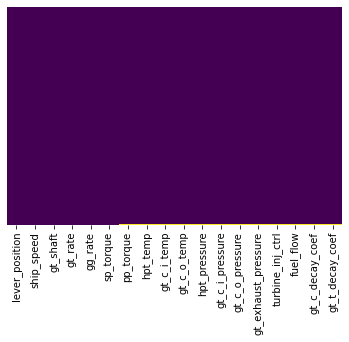

In [ ]:
sns.heatmap(ndata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
ndata.mean()

lever_position             5.164708
ship_speed                14.994213
gt_shaft               27178.804557
gt_rate                 2133.799355
gg_rate                 8224.268641
sp_torque                226.876676
pp_torque                226.938660
hpt_temp                 744.934013
gt_c_i_temp              288.000000
gt_c_o_temp              650.464222
hpt_pressure               2.342614
gt_c_i_pressure            0.998000
gt_c_o_pressure           12.248574
gt_exhaust_pressure        1.029037
turbine_inj_ctrl          35.079382
fuel_flow                  0.672437
gt_c_decay_coef            0.957260
gt_t_decay_coef            0.987291
dtype: float64

In [ ]:
ndata.corr(method= 'pearson')

,lever_position,ship_speed,gt_shaft,gt_rate,gg_rate,sp_torque,pp_torque,hpt_temp,gt_c_i_temp,gt_c_o_temp,hpt_pressure,gt_c_i_pressure,gt_c_o_pressure,gt_exhaust_pressure,turbine_inj_ctrl,fuel_flow,gt_c_decay_coef,gt_t_decay_coef
lever_position,1.000000,0.999915,0.961840,0.962732,0.986573,0.959637,0.959622,0.960779,NaN,0.984256,0.963980,NaN,0.970011,0.954937,0.898398,0.931541,-0.000730,-0.000040
ship_speed,0.999915,1.000000,0.959075,0.961036,0.987114,0.956753,0.956738,0.958423,NaN,0.982697,0.961551,NaN,0.967897,0.952414,0.895062,0.927964,-0.000738,-0.000040
gt_shaft,0.961840,0.959075,1.000000,0.989542,0.934761,0.999061,0.999061,0.990872,NaN,0.991501,0.998888,NaN,0.997555,0.996196,0.970188,0.994904,-0.003438,-0.005969
gt_rate,0.962732,0.961036,0.989542,1.000000,0.944190,0.988677,0.988676,0.977211,NaN,0.989920,0.995071,NaN,0.995930,0.996011,0.953997,0.979340,-0.000384,-0.000926
gg_rate,0.986573,0.987114,0.934761,0.944190,1.000000,0.931211,0.931188,0.938387,NaN,0.967760,0.939201,NaN,0.947563,0.928004,0.858518,0.897335,-0.007299,0.010008
sp_torque,0.959637,0.956753,0.999061,0.988677,0.931211,1.000000,1.000000,0.984695,NaN,0.988111,0.997981,NaN,0.996009,0.996536,0.970140,0.994057,-0.000482,-0.000113
pp_torque,0.959622,0.956738,0.999061,0.988676,0.931188,1.000000,1.000000,0.984695,NaN,0.988111,0.997981,NaN,0.996009,0.996536,0.970140,0.994057,-0.000482,-0.000113
hpt_temp,0.960779,0.958423,0.990872,0.977211,0.938387,0.984695,0.984695,1.000000,NaN,0.991127,0.988857,NaN,0.990048,0.980862,0.960165,0.985661,-0.023597,-0.058508
gt_c_i_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gt_c_o_temp,0.984256,0.982697,0.991501,0.989920,0.967760,0.988111,0.988111,0.991127,NaN,1.000000,0.993195,NaN,0.995929,0.987336,0.946392,0.976308,-0.019004,-0.023667


In [ ]:
# we can drop gt_c_i_pressure and gt_c_i_temp as they have only 1 unique value, and thus not conributing to our dataset
ndata=ndata.drop(['gt_c_i_pressure', 'gt_c_i_temp','sp_torque','gt_t_decay_coef'], axis=1)

In [ ]:
ndata.skew()

lever_position         0.023088
ship_speed             0.000785
gt_shaft               0.757605
gt_rate                0.563185
gg_rate               -0.138038
pp_torque              0.803169
hpt_temp               0.535683
gt_c_o_temp            0.412362
hpt_pressure           0.699393
gt_c_o_pressure        0.619251
gt_exhaust_pressure    0.750157
turbine_inj_ctrl       0.954059
fuel_flow              0.999444
gt_c_decay_coef        0.010744
dtype: float64

In [ ]:
ndata.columns

Index(['lever_position', 'ship_speed', 'gt_shaft', 'gt_rate', 'gg_rate',
       'pp_torque', 'hpt_temp', 'gt_c_o_temp', 'hpt_pressure',
       'gt_c_o_pressure', 'gt_exhaust_pressure', 'turbine_inj_ctrl',
       'fuel_flow', 'gt_c_decay_coef'],
      dtype='object')

<AxesSubplot:>

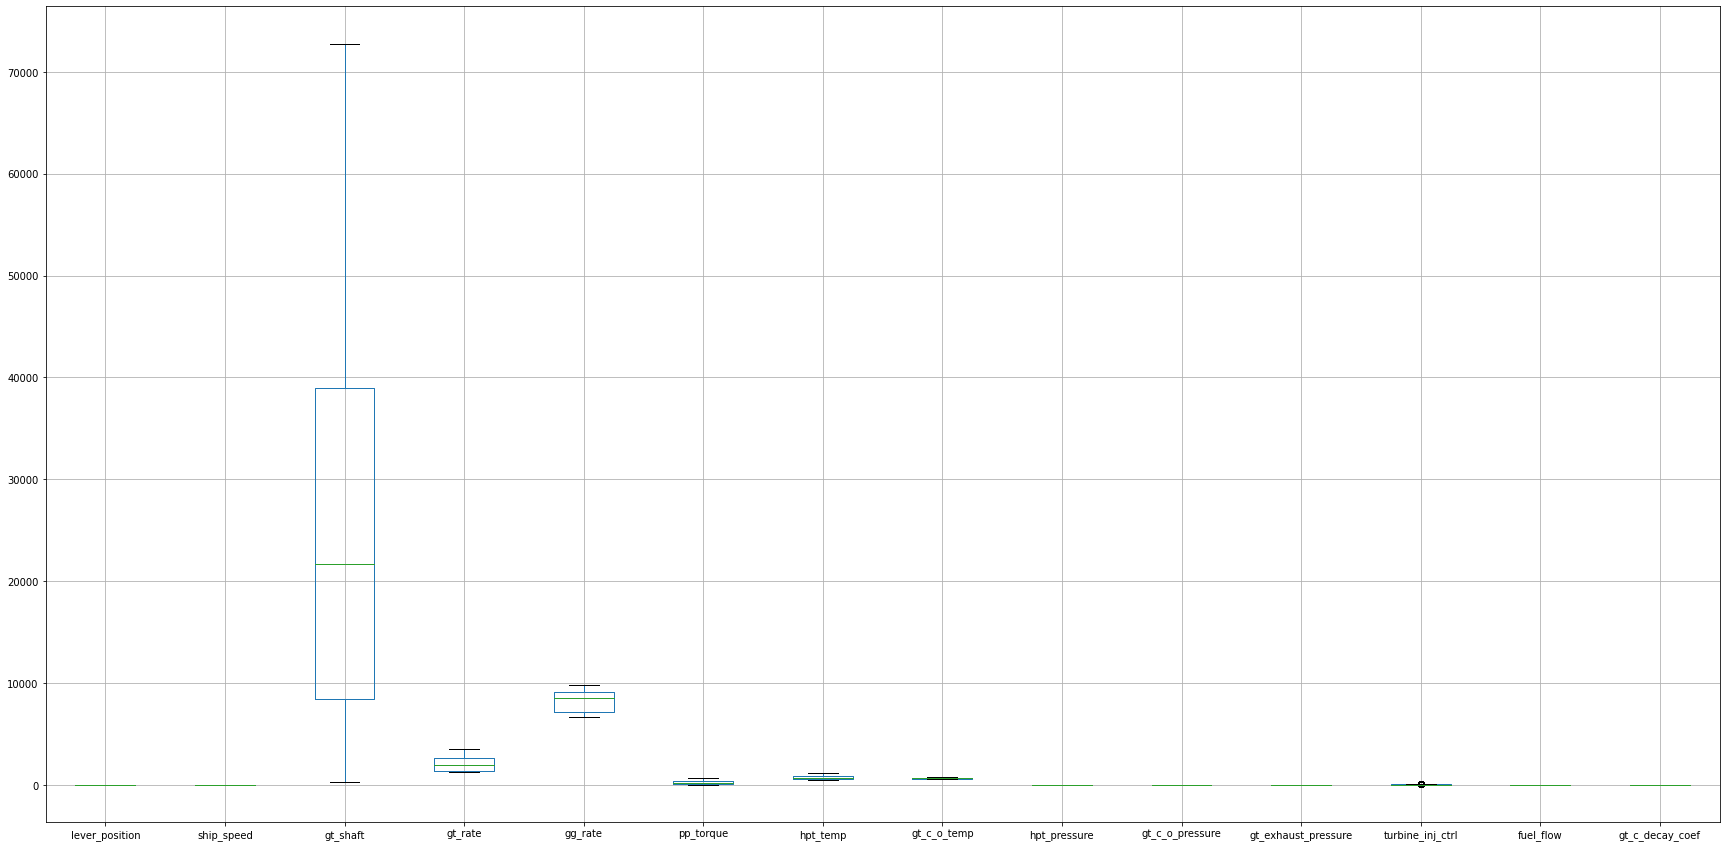

In [ ]:
ndata.boxplot(figsize=(30,15))

<AxesSubplot:>

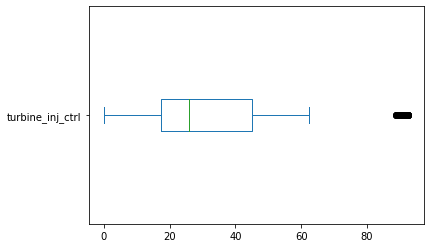

In [ ]:
ndata.turbine_inj_ctrl.plot(kind='box',vert=False)

In [ ]:
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(ndata['turbine_inj_ctrl']))
print(z)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3624   NaN
3625   NaN
3626   NaN
3627   NaN
3628   NaN
Name: turbine_inj_ctrl, Length: 3629, dtype: float64


In [ ]:
threshold = 2

print(np.where(z > 2))

(array([], dtype=int64),)


In [ ]:
Q1 = np.percentile(ndata['turbine_inj_ctrl'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(ndata['turbine_inj_ctrl'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

<ipython-input-28-d45854da0e89>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(ndata['turbine_inj_ctrl'], 25,
<ipython-input-28-d45854da0e89>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(ndata['turbine_inj_ctrl'], 75,


In [ ]:
print(np.where((ndata['turbine_inj_ctrl']>90)))

(array([   8,   17,   26,   35,   44,   53,   62,   71,   80,   89,   98,
        107,  116,  125,  134,  143,  152,  161,  170,  179,  188,  197,
        206,  215,  224,  242,  251,  260,  269,  278,  287,  296,  305,
        314,  323,  332,  341,  350,  359,  368,  377,  386,  395,  404,
        413,  422,  431,  440,  449,  476,  485,  494,  503,  512,  521,
        530,  539,  548,  557,  566,  575,  584,  593,  602,  611,  620,
        629,  638,  647,  656,  665,  674,  710,  719,  728,  737,  746,
        755,  764,  773,  782,  791,  800,  809,  818,  827,  836,  845,
        854,  863,  872,  881,  890,  899,  908,  944,  953,  962,  971,
        980,  989,  998, 1007, 1016, 1025, 1034, 1043, 1052, 1061, 1070,
       1079, 1088, 1097, 1106, 1115, 1124, 1133, 1178, 1187, 1196, 1205,
       1214, 1223, 1232, 1241, 1250, 1259, 1268, 1277, 1286, 1295, 1304,
       1313, 1322, 1331, 1340, 1349, 1358, 1412, 1421, 1430, 1439, 1448,
       1457, 1466, 1475, 1484, 1493, 1502, 1511, 1

In [ ]:
def remove_outliers_zscore(ndata, column, threshold=3):
    """
    Remove outliers from a column using the z-score.
    
    Parameters:
    - data: pandas DataFrame containing the data
    - column: str, name of the column containing the data
    - threshold: float, number of standard deviations above or below the mean to consider as outlier
    
    Returns:
    - pandas DataFrame with outliers removed
    """
    # Calculate the z-score of the column
    z = np.abs((ndata[column] - ndata[column].mean()) / ndata[column].std())
    
    # Remove rows with z-score greater than threshold
    ndata = ndata[z <= threshold]
    
    return ndata

In [ ]:
ndata=pd.DataFrame(ndata)


In [ ]:
ndata = remove_outliers_zscore(ndata,'turbine_inj_ctrl')
print(ndata)

      lever_position  ship_speed   gt_shaft   gt_rate   gg_rate  pp_torque  \
0              1.138         3.0    289.964  1349.489  6677.380      7.584   
1              2.088         6.0   6960.180  1376.166  6828.469     28.204   
2              3.144         9.0   8379.229  1386.757  7111.811     60.358   
3              4.161        12.0  14724.395  1547.465  7792.630    113.774   
4              5.140        15.0  21636.432  1924.313  8494.777    175.306   
...              ...         ...        ...       ...       ...        ...   
3623           6.175        18.0  29792.040  2307.404  8824.416    246.216   
3624           7.148        21.0  38985.982  2678.077  9131.030    332.257   
3625           8.206        24.0  50994.798  3087.539  9314.004    438.086   
3626           9.300        27.0  72771.580  3560.417  9770.526    645.054   
3627           1.138         3.0   3489.903  1417.070  6724.777     11.508   

      hpt_temp  gt_c_o_temp  hpt_pressure  gt_c_o_pressure  \
0

<AxesSubplot:>

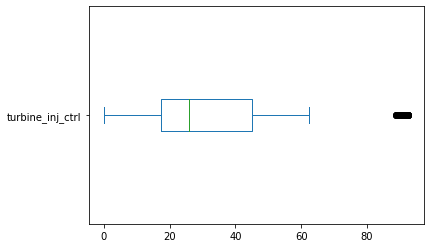

In [ ]:
ndata.turbine_inj_ctrl.plot(kind='box',vert=False)

In [ ]:
ndata.cov()

,lever_position,ship_speed,gt_shaft,gt_rate,gg_rate,pp_torque,hpt_temp,gt_c_o_temp,hpt_pressure,gt_c_o_pressure,gt_exhaust_pressure,turbine_inj_ctrl,fuel_flow,gt_c_decay_coef
lever_position,6.901808,20.354659,5.613351e+04,1.963390e+03,2.805081e+03,5.064007e+02,4.510375e+02,1.911639e+02,2.737645,1.355670e+01,2.548031e-02,60.046524,1.259013,-8.596934e-06
ship_speed,20.354659,60.039691,1.650856e+05,5.780671e+03,8.277927e+03,1.489102e+03,1.327040e+03,5.629310e+02,8.054138,3.989735e+01,7.495380e-02,176.445205,3.699107,-2.560728e-05
gt_shaft,56133.510348,165085.607989,4.935004e+08,1.706477e+07,2.247353e+07,4.458082e+06,3.933408e+06,1.628371e+06,23987.674294,1.178899e+05,2.247694e+02,548323.621442,11370.295711,-3.422764e-01
gt_rate,1963.390275,5780.671492,1.706477e+07,6.026249e+05,7.932596e+05,1.541664e+05,1.355562e+05,5.681200e+04,835.035990,4.112897e+03,7.853008e+00,18841.176831,391.114445,-1.336013e-03
gg_rate,2805.080608,8277.926825,2.247353e+07,7.932596e+05,1.171312e+06,2.024352e+05,1.814788e+05,7.743196e+04,1098.809325,5.455567e+03,1.020081e+01,23638.688312,499.617352,-3.539933e-02
pp_torque,506.400677,1489.102470,4.458082e+06,1.541664e+05,2.024352e+05,4.034827e+04,3.534450e+04,1.467353e+04,216.701610,1.064317e+03,2.033078e+00,4957.745892,102.723601,-4.341770e-04
hpt_temp,451.037531,1327.040175,3.933408e+06,1.355562e+05,1.814788e+05,3.534450e+04,3.193120e+04,1.309343e+04,191.015540,9.411515e+02,1.780181e+00,4365.068662,90.611187,-1.889462e-02
gt_c_o_temp,191.163852,562.931043,1.628371e+06,5.681200e+04,7.743196e+04,1.467353e+04,1.309343e+04,5.465537e+03,79.374027,3.916882e+02,7.413612e-01,1780.020091,37.132122,-6.295651e-03
hpt_pressure,2.737645,8.054138,2.398767e+04,8.350360e+02,1.098809e+03,2.167016e+02,1.910155e+02,7.937403e+01,1.168571,5.747171e+00,1.096308e-02,26.630017,0.551961,-1.830841e-06
gt_c_o_pressure,13.556699,39.897346,1.178899e+05,4.112897e+03,5.455567e+03,1.064317e+03,9.411515e+02,3.916882e+02,5.747171,2.830032e+01,5.387506e-02,130.411991,2.706488,5.913279e-07


In [ ]:
corr=ndata.corr()
print(corr)

                     lever_position  ship_speed  gt_shaft   gt_rate   gg_rate  \
lever_position             1.000000    0.999915  0.961827  0.962724  0.986570   
ship_speed                 0.999915    1.000000  0.959061  0.961027  0.987111   
gt_shaft                   0.961827    0.959061  1.000000  0.989540  0.934741   
gt_rate                    0.962724    0.961027  0.989540  1.000000  0.944182   
gg_rate                    0.986570    0.987111  0.934741  0.944182  1.000000   
pp_torque                  0.959622    0.956738  0.999061  0.988676  0.931188   
hpt_temp                   0.960779    0.958423  0.990872  0.977211  0.938387   
gt_c_o_temp                0.984256    0.982697  0.991501  0.989920  0.967760   
hpt_pressure               0.963980    0.961551  0.998888  0.995071  0.939201   
gt_c_o_pressure            0.970011    0.967897  0.997555  0.995930  0.947563   
gt_exhaust_pressure        0.954937    0.952414  0.996196  0.996011  0.928004   
turbine_inj_ctrl           0

In [ ]:
corr_matrix = ndata.corr()
print(corr_matrix)

                     lever_position  ship_speed  gt_shaft   gt_rate   gg_rate  \
lever_position             1.000000    0.999915  0.961827  0.962724  0.986570   
ship_speed                 0.999915    1.000000  0.959061  0.961027  0.987111   
gt_shaft                   0.961827    0.959061  1.000000  0.989540  0.934741   
gt_rate                    0.962724    0.961027  0.989540  1.000000  0.944182   
gg_rate                    0.986570    0.987111  0.934741  0.944182  1.000000   
pp_torque                  0.959622    0.956738  0.999061  0.988676  0.931188   
hpt_temp                   0.960779    0.958423  0.990872  0.977211  0.938387   
gt_c_o_temp                0.984256    0.982697  0.991501  0.989920  0.967760   
hpt_pressure               0.963980    0.961551  0.998888  0.995071  0.939201   
gt_c_o_pressure            0.970011    0.967897  0.997555  0.995930  0.947563   
gt_exhaust_pressure        0.954937    0.952414  0.996196  0.996011  0.928004   
turbine_inj_ctrl           0

# EDA

<AxesSubplot:>

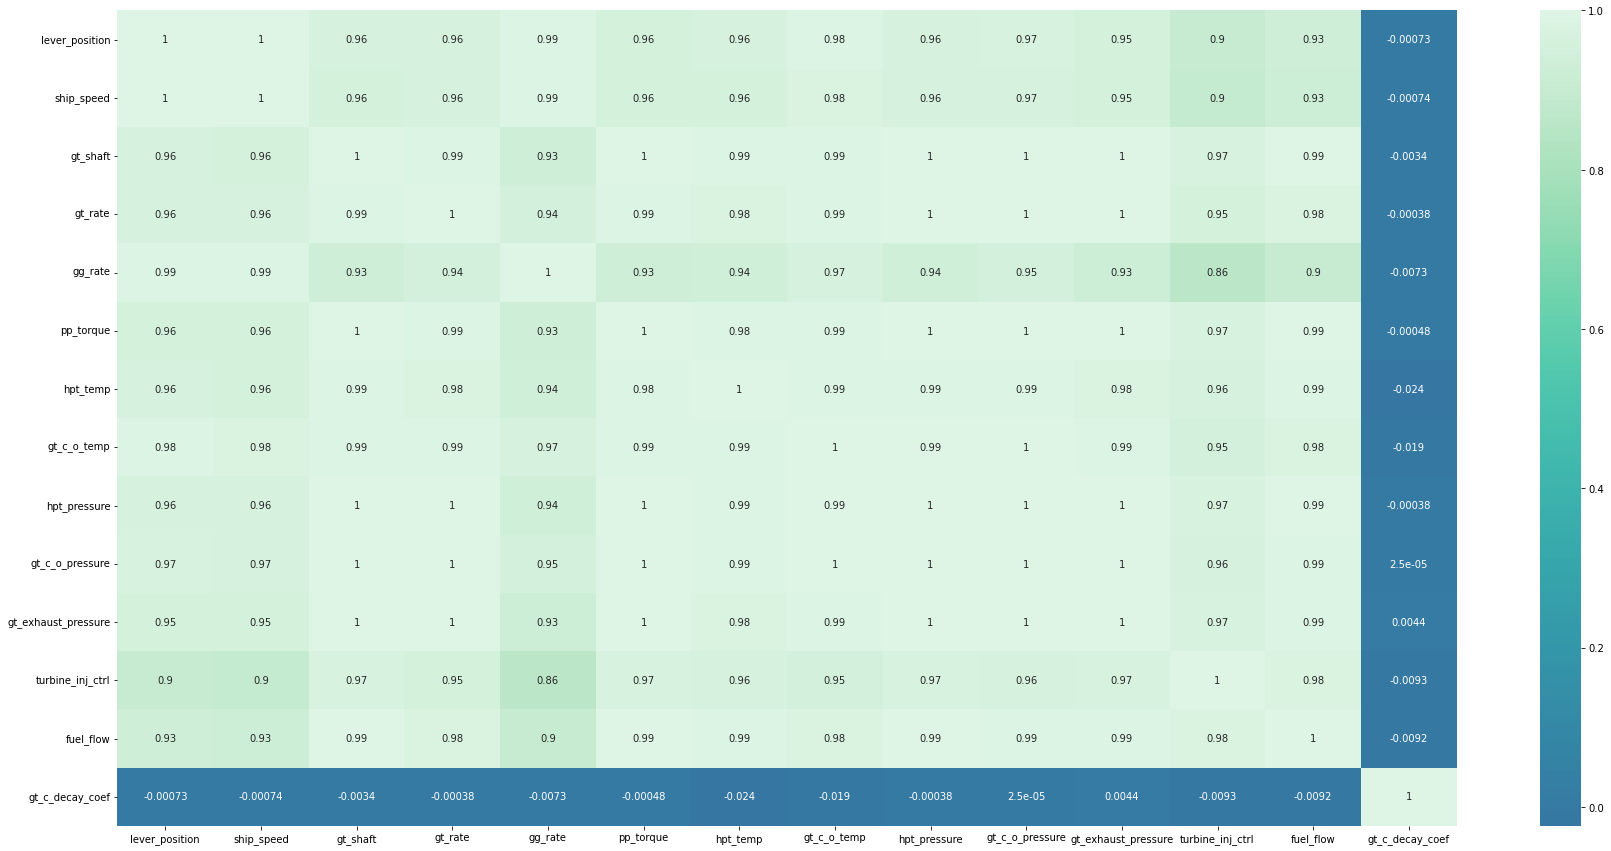

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(corr,annot=True, cmap= 'mako', center =0)

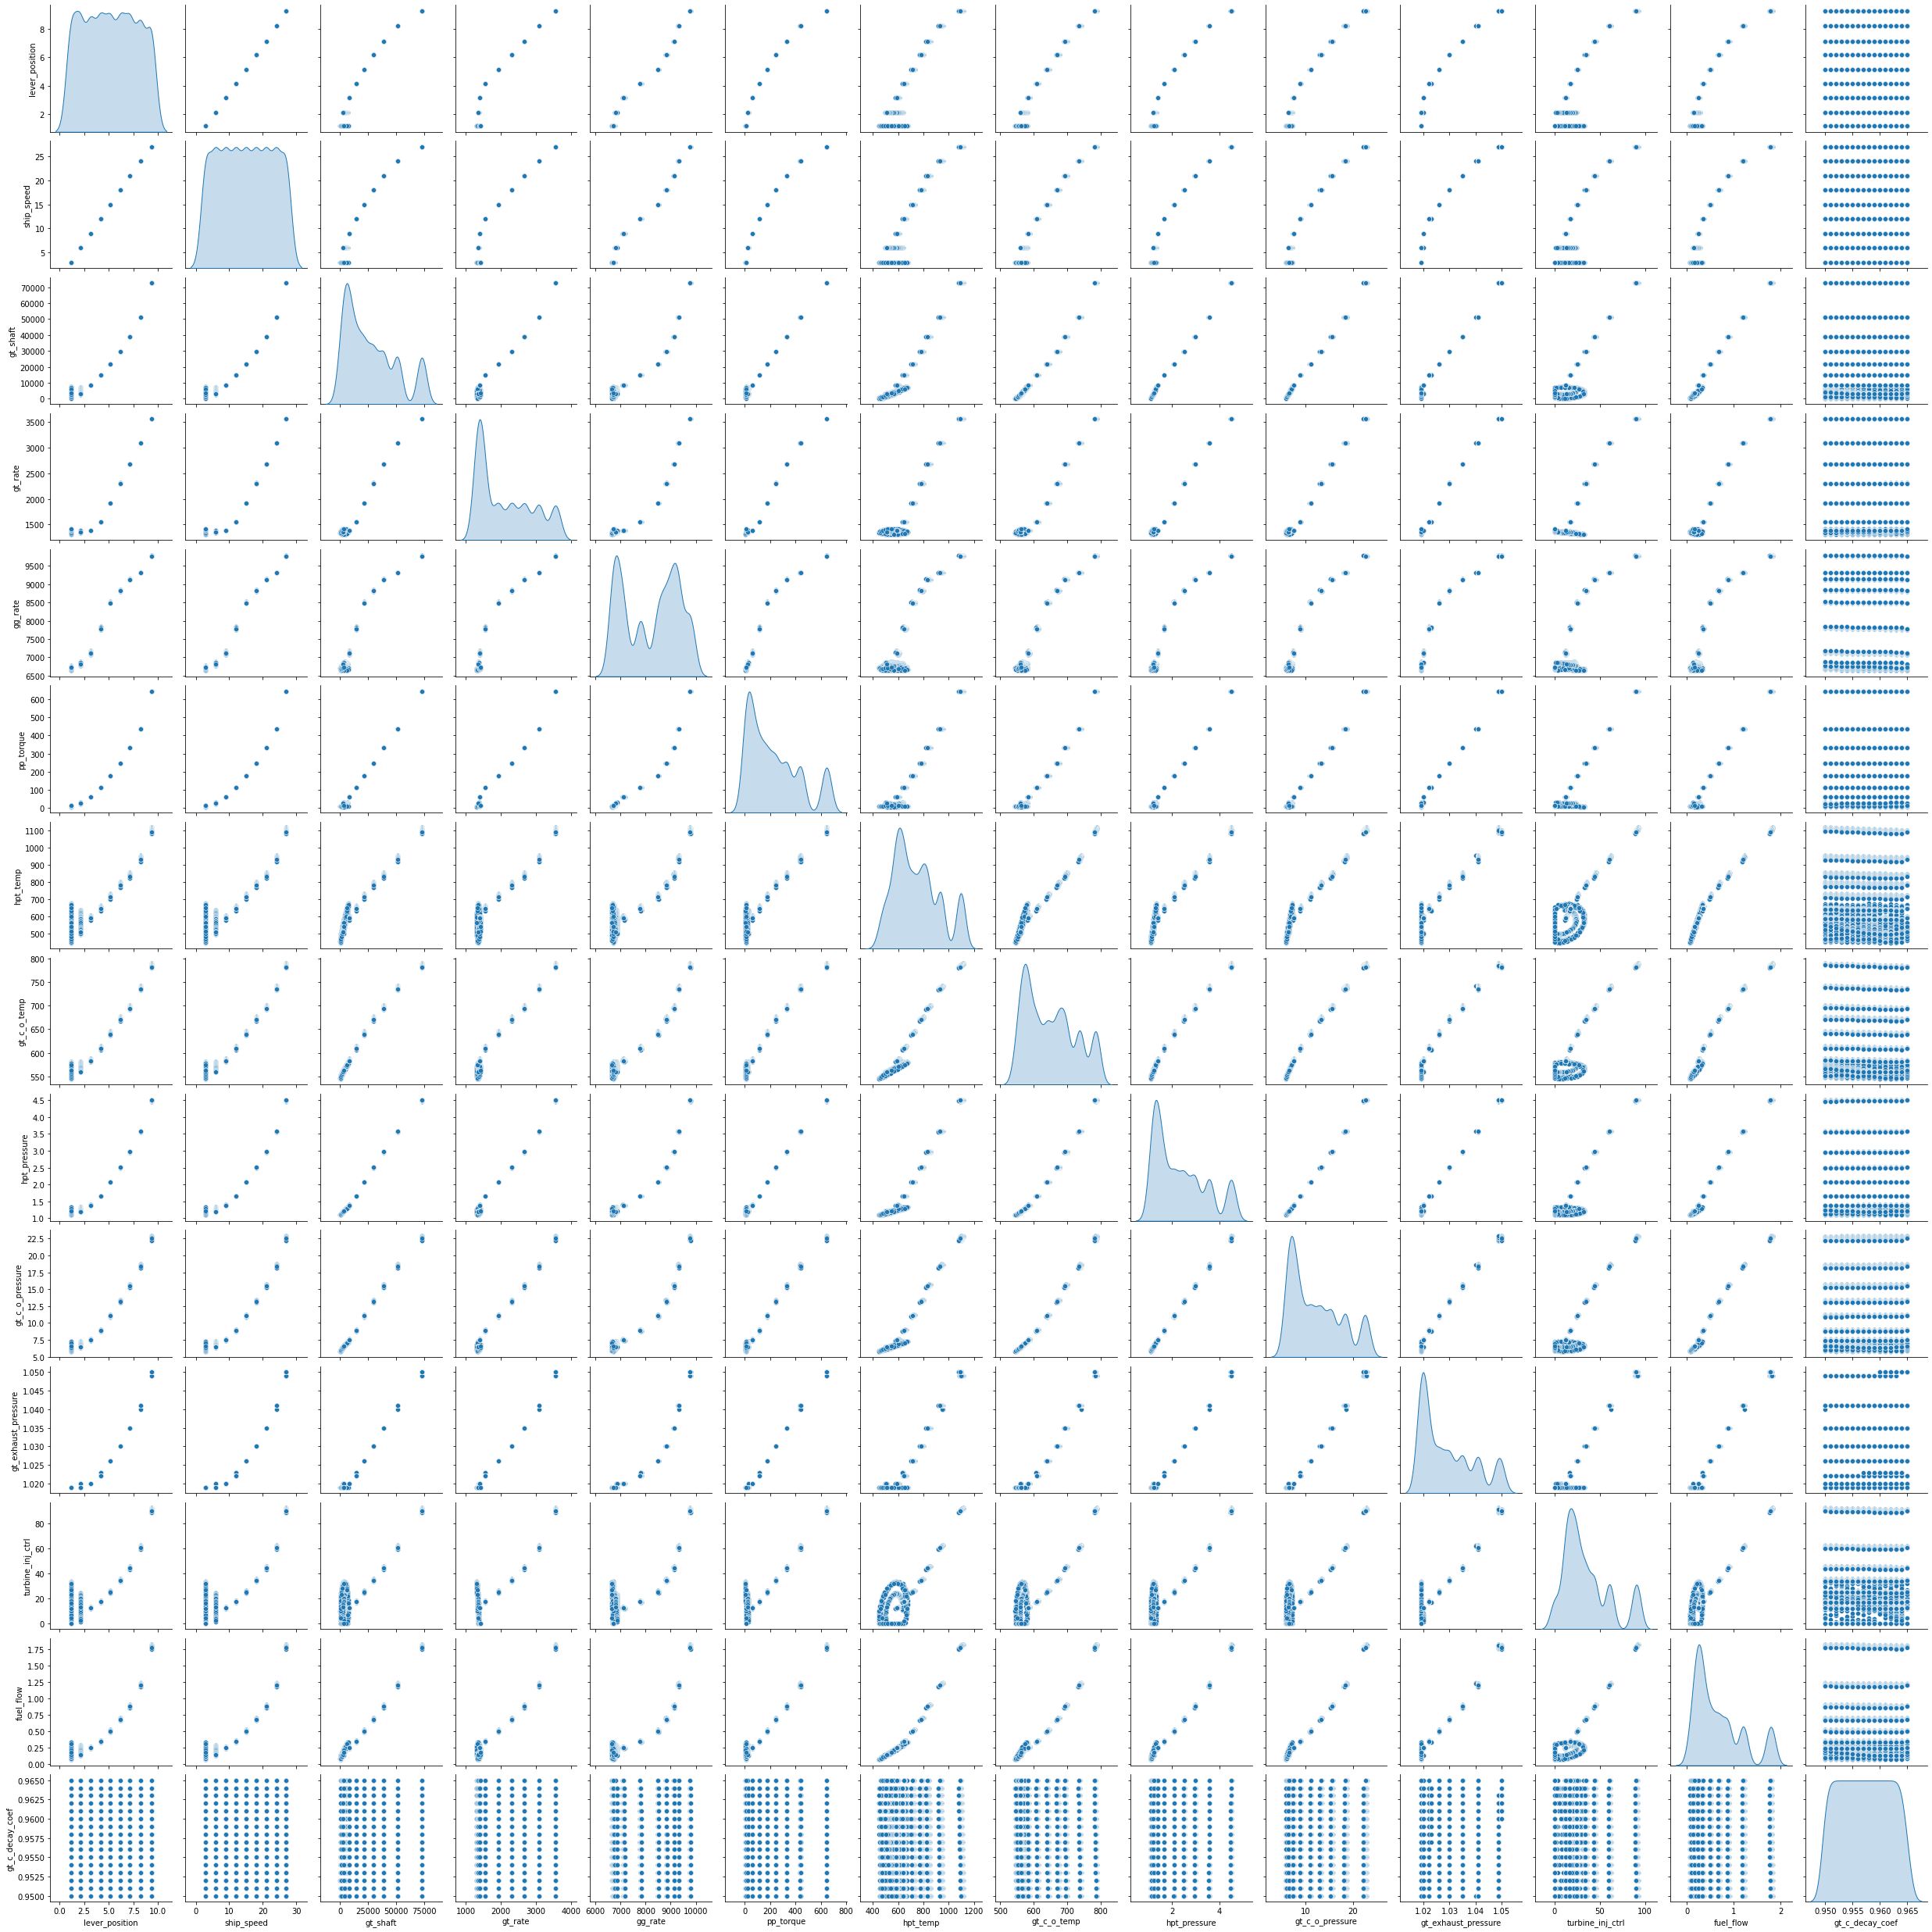

In [ ]:
sns.pairplot(ndata,diag_kind='kde')

In [ ]:
ndata.columns

Index(['lever_position', 'ship_speed', 'gt_shaft', 'gt_rate', 'gg_rate',
       'pp_torque', 'hpt_temp', 'gt_c_o_temp', 'hpt_pressure',
       'gt_c_o_pressure', 'gt_exhaust_pressure', 'turbine_inj_ctrl',
       'fuel_flow', 'gt_c_decay_coef'],
      dtype='object')

In [ ]:
features = ['lever_position', 'ship_speed', 'gt_shaft', 'gt_rate', 'gg_rate','pp_torque', 'hpt_temp', 'gt_c_o_temp',
            'hpt_pressure','gt_c_o_pressure', 'gt_exhaust_pressure', 'turbine_inj_ctrl','fuel_flow', 'gt_c_decay_coef',
            'gt_t_decay_coef']

In [ ]:
list(enumerate(features))

[(0, 'lever_position'),
 (1, 'ship_speed'),
 (2, 'gt_shaft'),
 (3, 'gt_rate'),
 (4, 'gg_rate'),
 (5, 'pp_torque'),
 (6, 'hpt_temp'),
 (7, 'gt_c_o_temp'),
 (8, 'hpt_pressure'),
 (9, 'gt_c_o_pressure'),
 (10, 'gt_exhaust_pressure'),
 (11, 'turbine_inj_ctrl'),
 (12, 'fuel_flow'),
 (13, 'gt_c_decay_coef'),
 (14, 'gt_t_decay_coef')]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

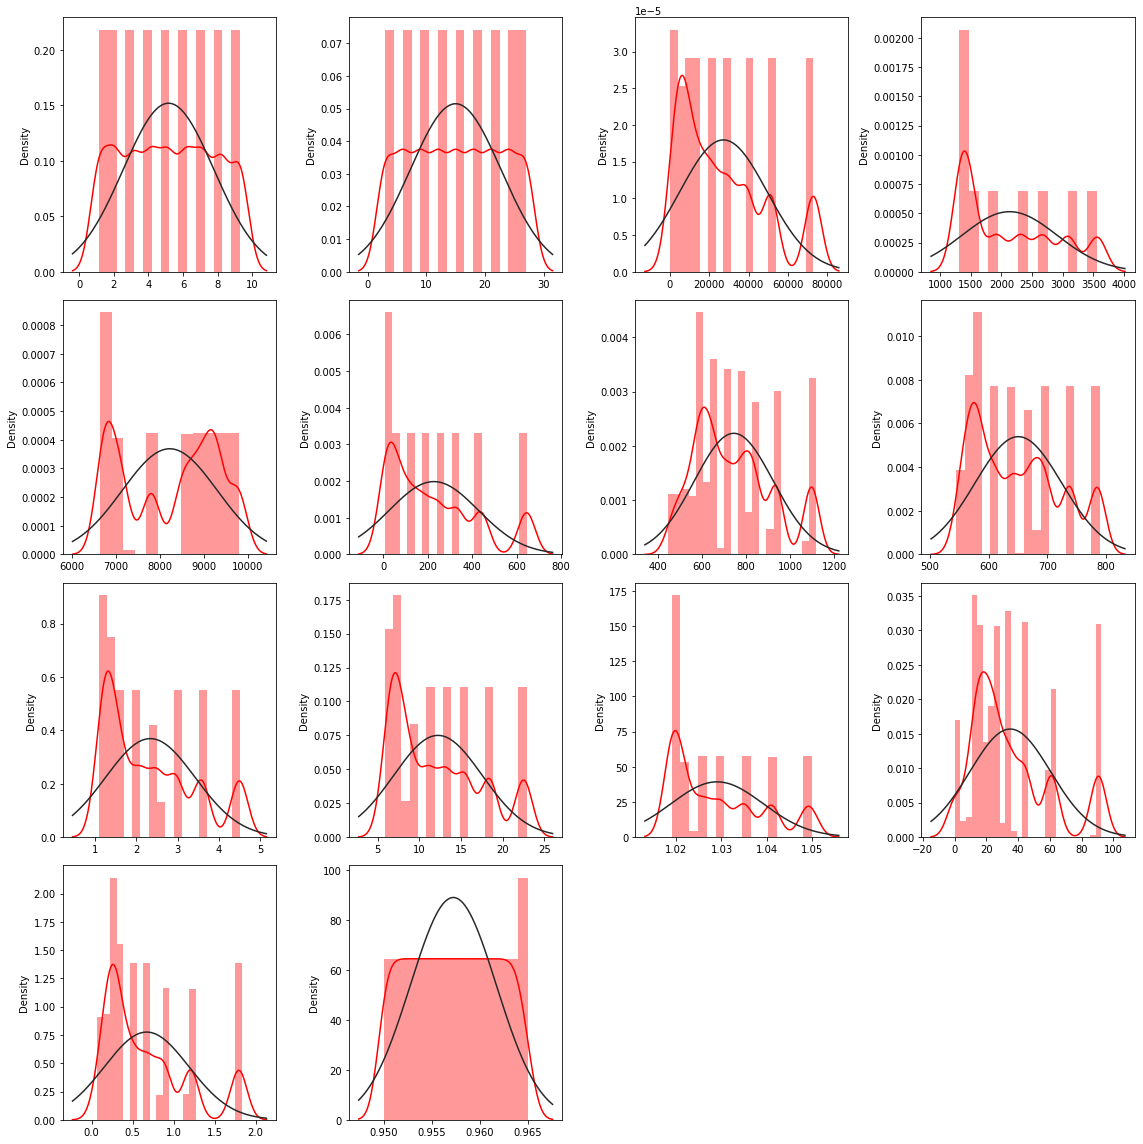

In [ ]:
cols = 4
rows = 4
num_cols = ndata.columns
fig = plt.figure( figsize=(cols*4, rows*4))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.distplot(x = ndata[col], ax = ax,fit= norm, color='red')
    
    
fig.tight_layout()  
plt.show()

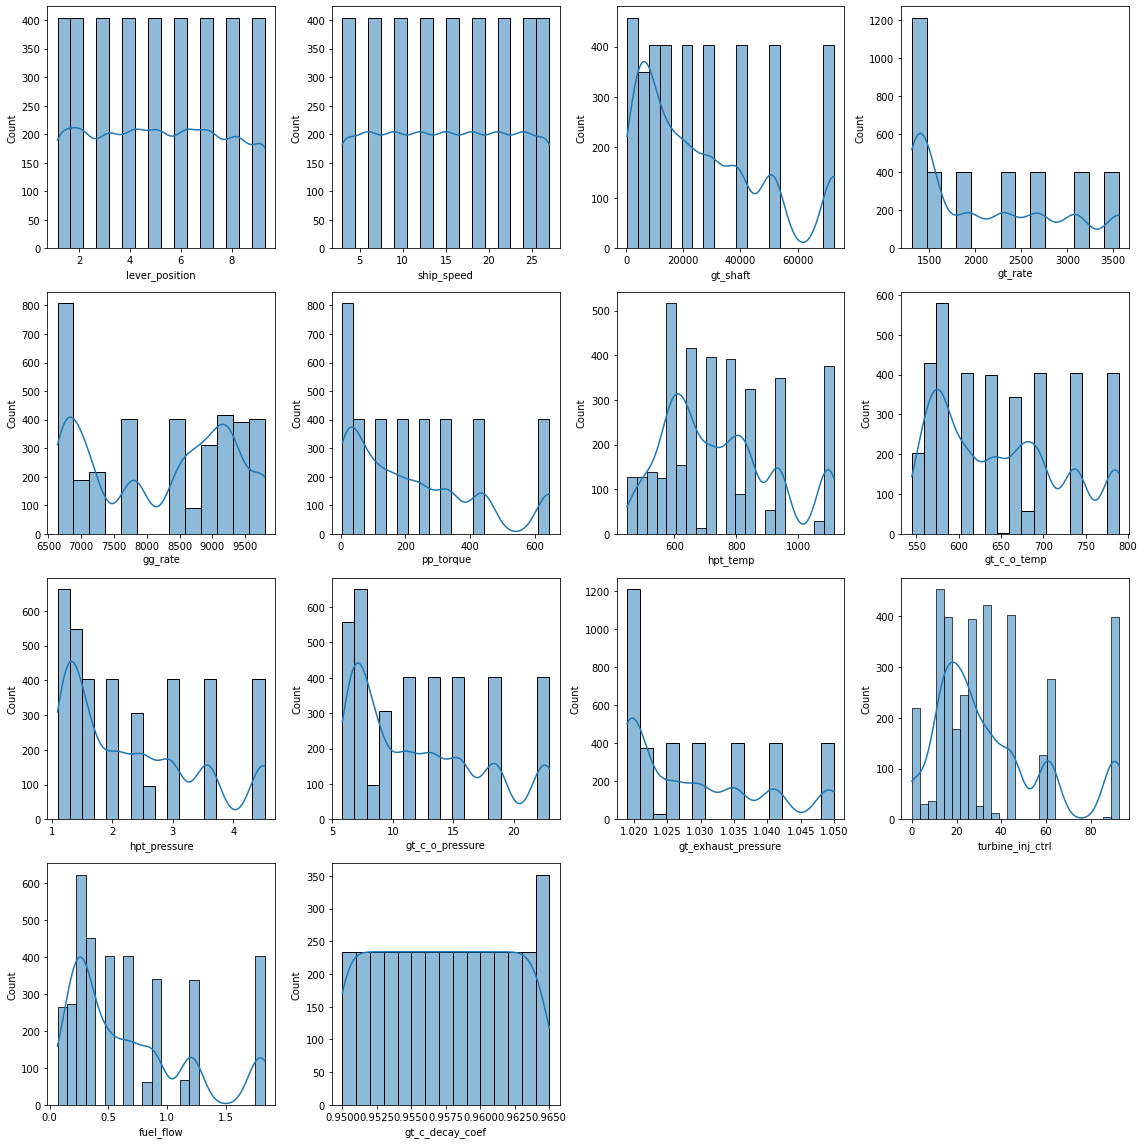

In [ ]:
cols = 4
rows = 4
num_cols = ndata.columns
fig = plt.figure( figsize=(cols*4, rows*4))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = ndata[col], ax = ax,kde=True)
    
    
fig.tight_layout()  
plt.show()

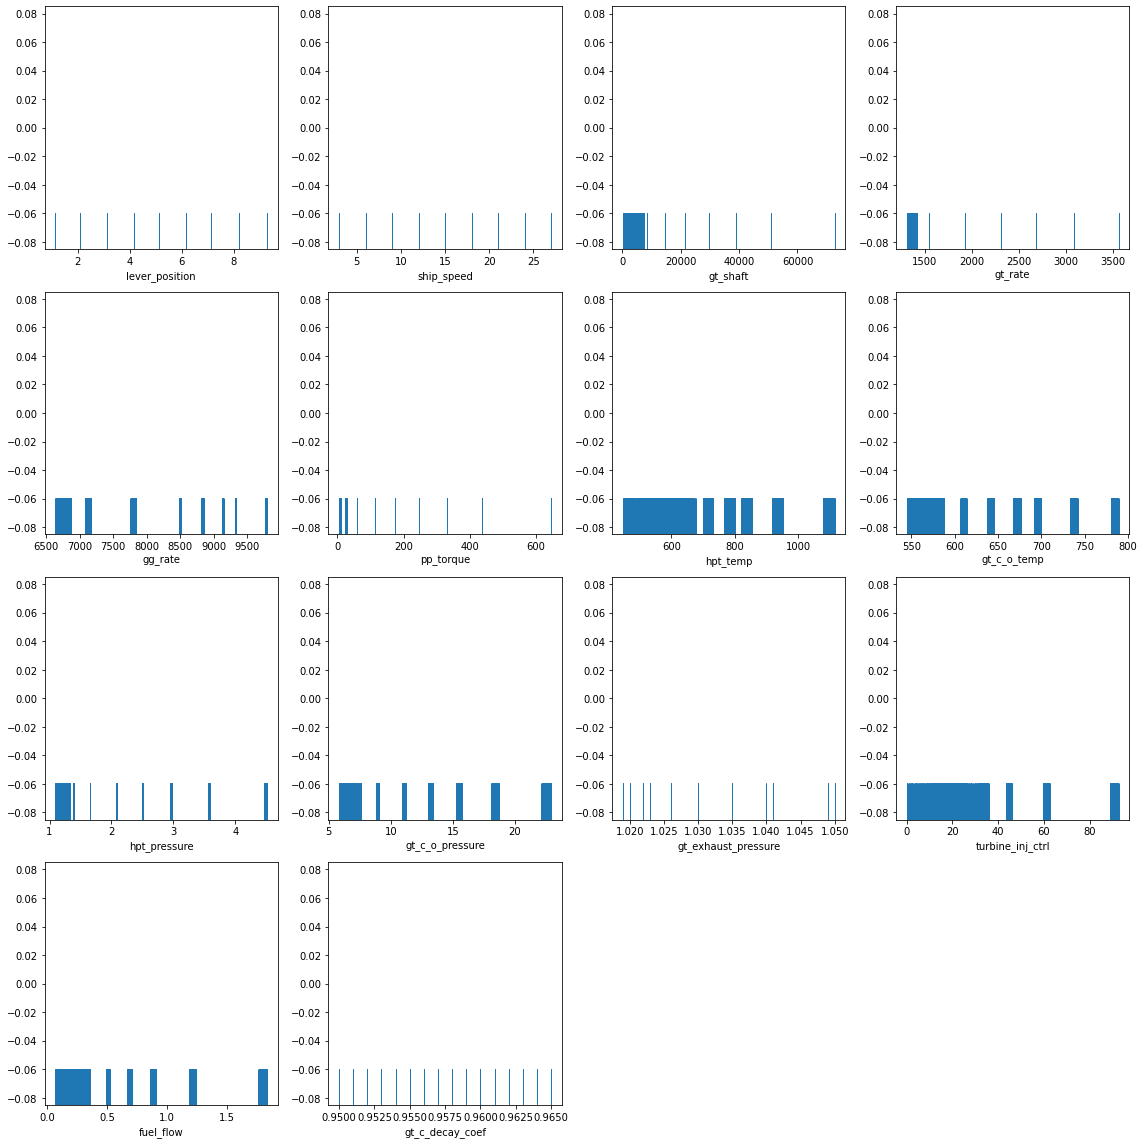

In [ ]:
cols = 4
rows = 4
num_cols = ndata.columns
fig = plt.figure( figsize=(cols*4, rows*4))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.rugplot(x = ndata[col], ax = ax, height= 0.15)
    
fig.tight_layout()  
plt.show()

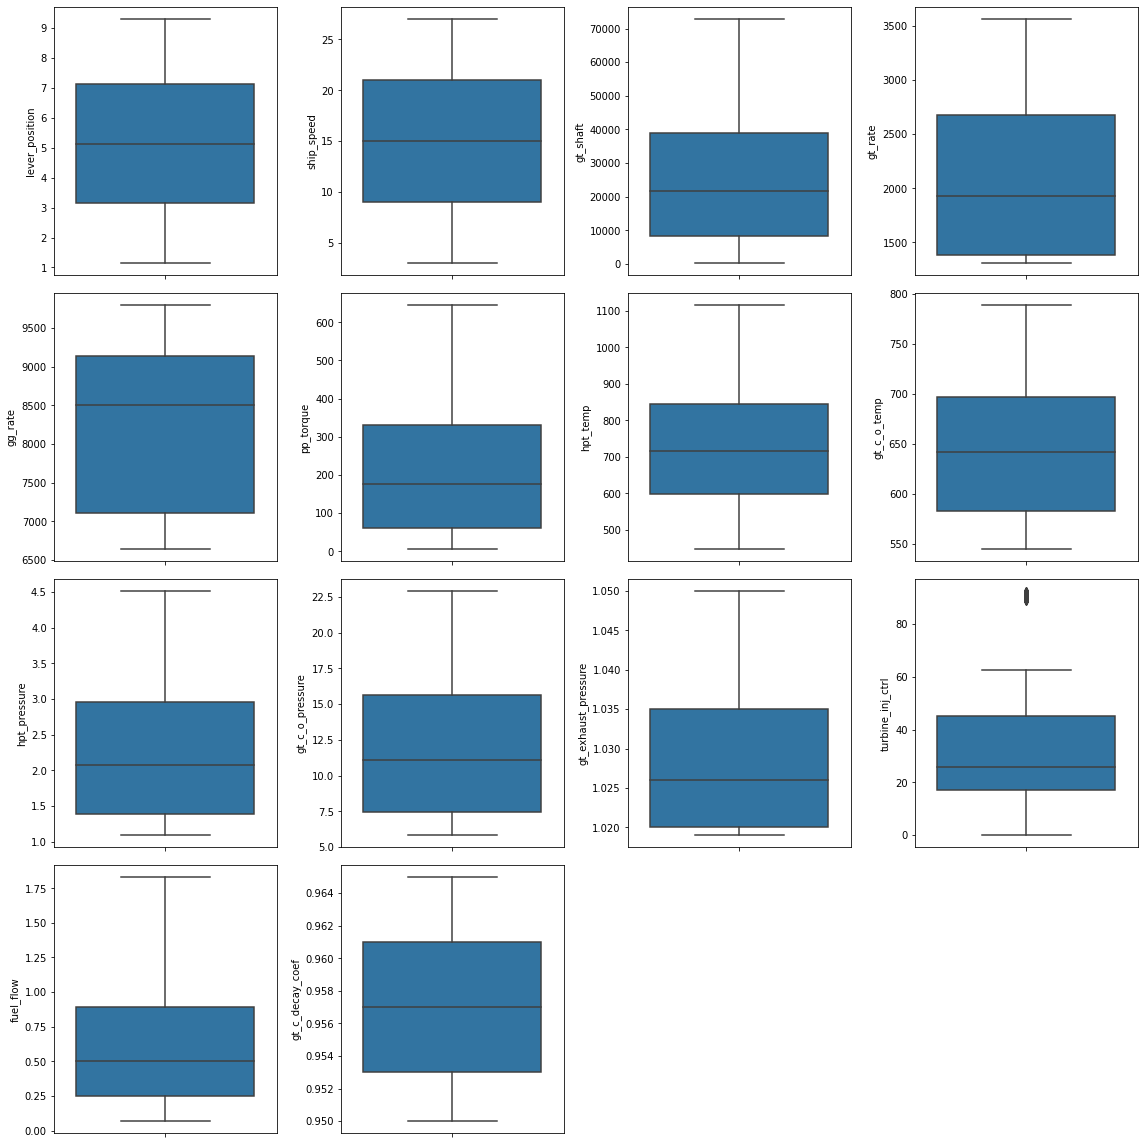

In [ ]:
cols = 4
rows = 4
num_cols = ndata.columns
fig = plt.figure( figsize=(cols*4, rows*4))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.boxplot(y= ndata[col], ax = ax)
    
fig.tight_layout()  
plt.show()

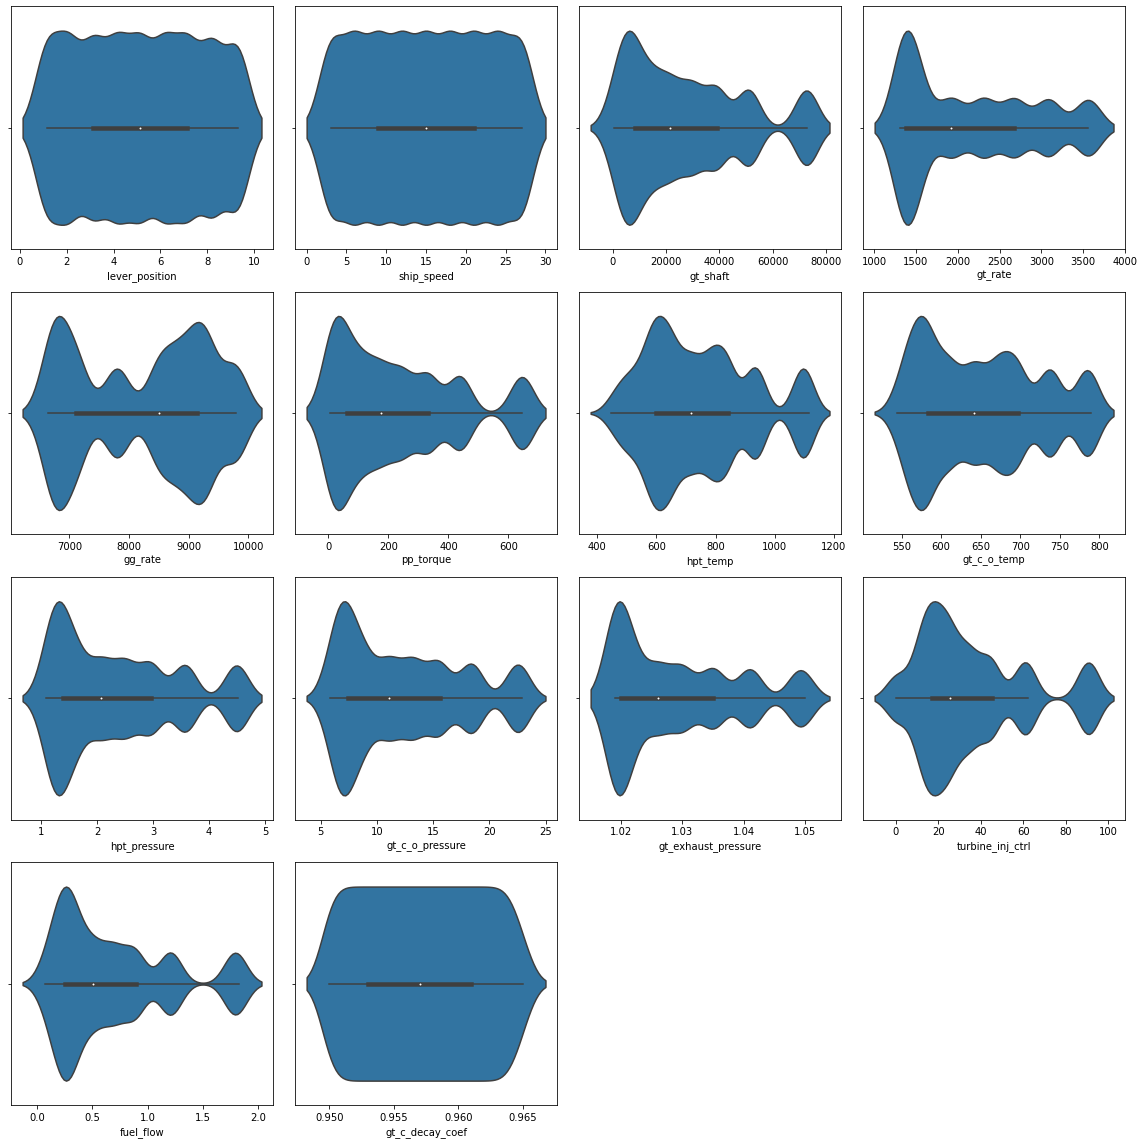

In [ ]:
cols = 4
rows = 4
num_cols = ndata.columns
fig = plt.figure( figsize=(cols*4, rows*4))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.violinplot(x = ndata[col], ax = ax)
    
fig.tight_layout()  
plt.show()

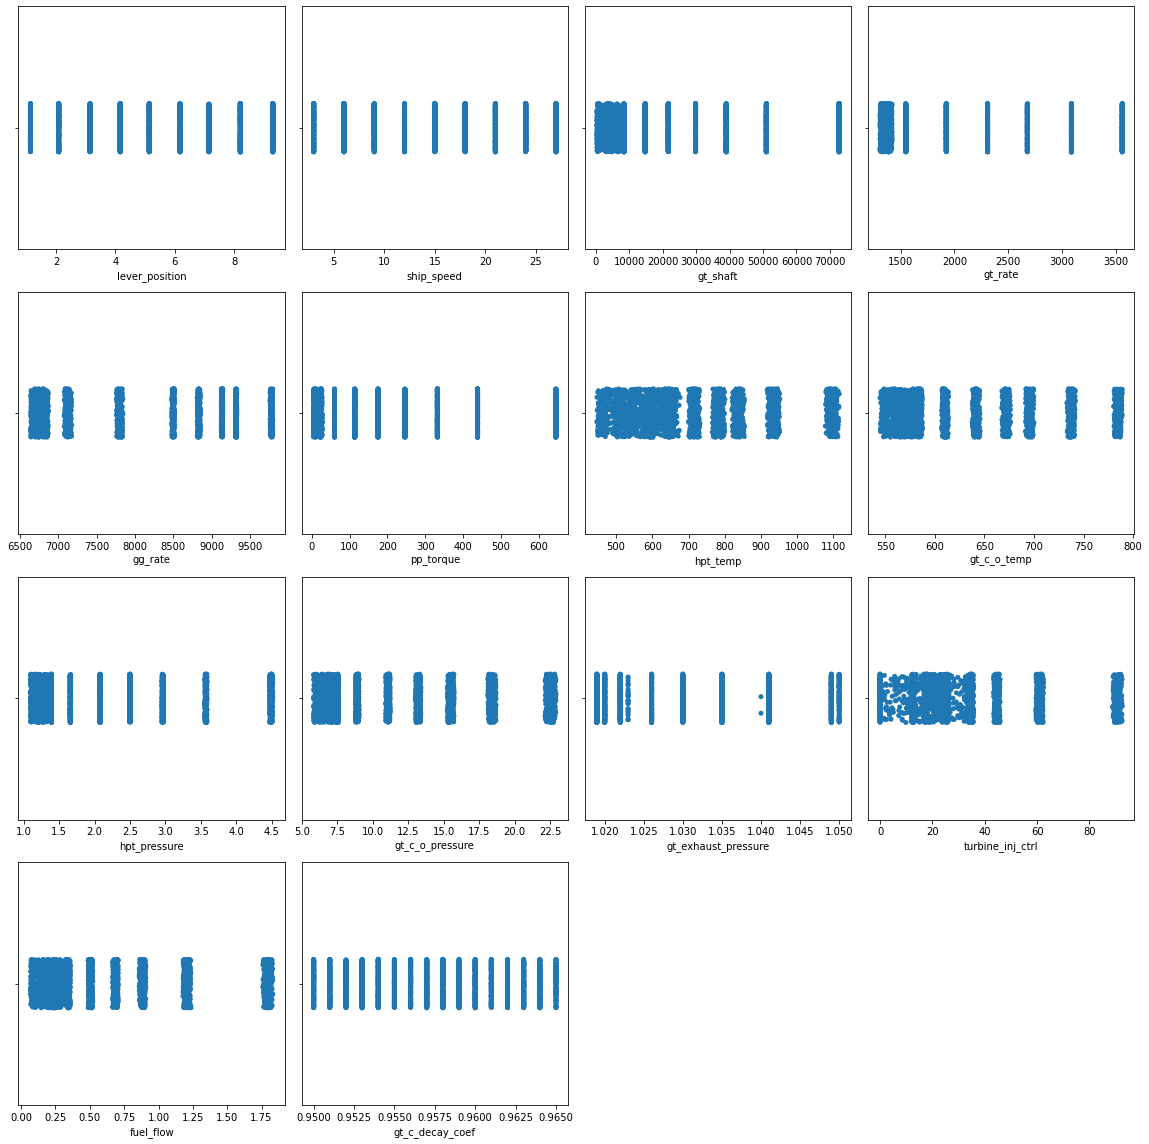

In [ ]:
cols = 4
rows = 4
num_cols = ndata.columns
fig = plt.figure( figsize=(cols*4, rows*4))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.stripplot(x = ndata[col], ax = ax)
    
fig.tight_layout()  
plt.show()

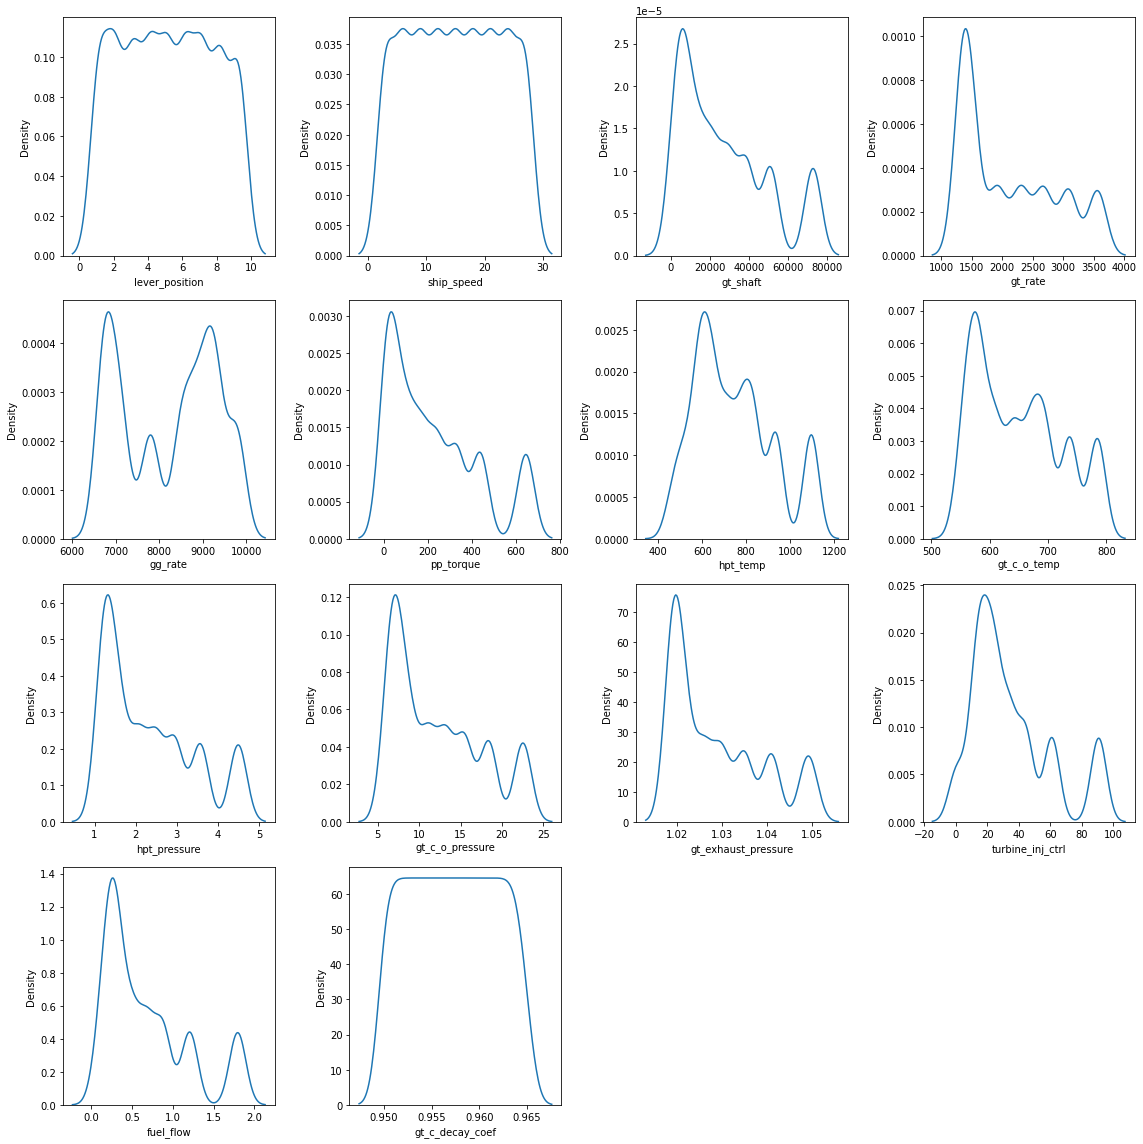

In [ ]:
cols = 4
rows = 4
num_cols = ndata.columns
fig = plt.figure( figsize=(cols*4, rows*4))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.kdeplot(x = ndata[col], ax = ax)
    
fig.tight_layout()  
plt.show()

In [ ]:
ntdata=ndata[['lever_position', 'ship_speed', 'gt_shaft', 'gt_rate', 'gg_rate','pp_torque', 'hpt_temp', 'gt_c_o_temp', 'hpt_pressure',
       'gt_c_o_pressure', 'gt_exhaust_pressure', 'turbine_inj_ctrl',
       'fuel_flow', 'gt_c_decay_coef']]

In [ ]:
ntdata.head()

,lever_position,ship_speed,gt_shaft,gt_rate,gg_rate,pp_torque,hpt_temp,gt_c_o_temp,hpt_pressure,gt_c_o_pressure,gt_exhaust_pressure,turbine_inj_ctrl,fuel_flow,gt_c_decay_coef
0,1.138,3.0,289.964,1349.489,6677.380,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082,0.95
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259,0.95
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358,0.95
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522,0.95


# Split data to X(Features) and Y(Responses)

In [ ]:
# Dependent Variable which is the variable being predicted is y
y=ntdata['gt_c_decay_coef']
# All other Variables are Independent Variables that are used for prediction
# denoted by X
x=ntdata.drop('gt_c_decay_coef',axis=1)

In [ ]:
x_train,x_test,y_train, y_test = train_test_split(x,y ,
                                   random_state=42, 
                                   test_size=0.40, 
                                   shuffle=True)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape, y_test.shape)

(2176, 13) (1452, 13) (2176,) (1452,)


In [ ]:
print('x_train : ')
print(x_train.head())
print('')
print('x_test : ')
print(x_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

x_train : 
      lever_position  ship_speed   gt_shaft   gt_rate   gg_rate  pp_torque  \
643            5.140        15.0  21639.118  1924.345  8510.201    175.304   
3177           1.138         3.0   5708.740  1402.775  6726.370     10.679   
3497           6.175        18.0  29796.033  2307.258  8837.822    246.288   
669            4.161        12.0  14725.988  1547.478  7832.525    113.818   
3288           4.161        12.0  14722.183  1547.458  7762.387    113.772   

      hpt_temp  gt_c_o_temp  hpt_pressure  gt_c_o_pressure  \
643    711.847      641.683         2.074           10.984   
3177   606.780      572.379         1.296            6.980   
3497   766.727      667.663         2.499           13.057   
669    641.162      609.869         1.653            8.812   
3288   653.995      610.586         1.660            9.011   

      gt_exhaust_pressure  turbine_inj_ctrl  fuel_flow  
643                 1.026            25.263      0.500  
3177                1.019        

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


# installing and using linearregression class

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
c= lr.intercept_
c

5.873814810369581

In [ ]:
m = lr.coef_
m

array([ 9.89055840e-02, -3.29347728e-02, -5.92100465e-06, -1.15728476e-04,
       -5.60756523e-06,  1.04089056e-05,  2.88128408e-04, -1.79457229e-03,
        4.02117809e-01,  8.60188141e-03, -4.27248034e+00,  1.32773891e-04,
       -2.74629324e-01])

In [ ]:
y_pred_train = lr.predict(x_train)

In [ ]:
y_pred_train

array([0.95595129, 0.96034123, 0.96189004, ..., 0.95391763, 0.96518804,
       0.96386871])

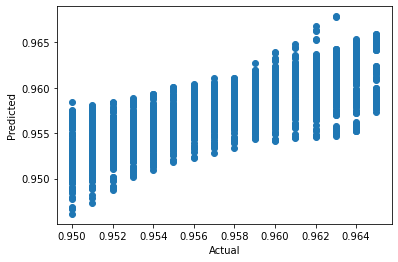

In [ ]:
plt.scatter(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [ ]:
r2_score(y_train, y_pred_train)

0.6231026211214179

In [ ]:
y_pred_test = lr.predict(x_test)

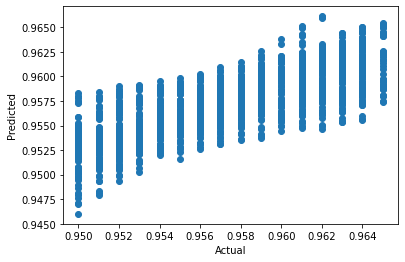

In [ ]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
r2_score(y_test, y_pred_test)

0.6097487981702283

In [ ]:
#the MAE
print('The MAE is:', metrics.mean_absolute_error(y_train,y_pred_train))

The MAE is: 0.0021097711065883357


In [ ]:
#the MAE
print('The MAE is:', metrics.mean_absolute_error(y_test,y_pred_test))

The MAE is: 0.0021580173387477407


# decision tree regressor model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#creating and fitting the model
LL_dt = DecisionTreeRegressor().fit(x_train,y_train)

In [ ]:
# the coefficient of determination
print('the training r_sq is: %.2f'% LL_dt.score(x_train,y_train))

the training r_sq is: 1.00


In [ ]:
#training model evaluation 
from sklearn.metrics import mean_absolute_error

In [ ]:
#prediction on the trainig dataset
ytrain_pred = LL_dt.predict(x_train)

In [ ]:
# the r_sq
print('the r_sq is:', r2_score(y_train, ytrain_pred))

the r_sq is: 1.0


In [ ]:
#the MAE
print('The MAE is:', mean_absolute_error(y_train, ytrain_pred))

The MAE is: 9.745064232693239e-18


In [ ]:
#the MSE
print('The MSE is:', mean_squared_error(y_train, ytrain_pred))

The MSE is: 1.1725514661416406e-33


In [ ]:
#the RMSE
print('The RMSE is:', np.sqrt(mean_squared_error(y_train, ytrain_pred)))

The RMSE is: 3.424253883901777e-17


In [ ]:
#the explained variance score EVS
print('the EVS is:', explained_variance_score(y_train, ytrain_pred))

the EVS is: 1.0


In [ ]:
#prediction on the testing data
ytest_pred = LL_dt.predict(x_test)

In [ ]:
# the r_sq
print('the r_sq is:', r2_score(y_test, ytest_pred))

the r_sq is: 0.8748288803665287


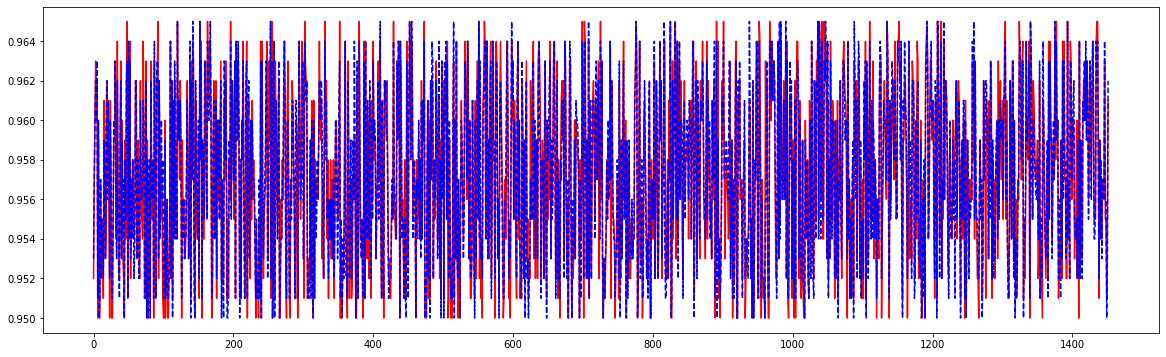

In [ ]:
#plotting the observed and predicted #setting the
#plotting
plt.rcParams['figure.figsize']= (20,6)
x_ax = range(len(x_test))
plt.plot(x_ax,y_test, label = 'Observed', color = 'red', linestyle = '-')
plt.plot(x_ax,ytest_pred, label = 'Predicted', color = 'blue', linestyle = '--')

# Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rdregressor=RandomForestRegressor()
rdregressor.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
# the coefficient of determination
print('the training r_sq is: %.2f'% rdregressor.score(x_train,y_train))

the training r_sq is: 0.99


In [ ]:
#prediction on the trainig dataset
rytrain_pred = rdregressor.predict(x_train)

In [ ]:
#prediction on the testing data
rytest_pred = rdregressor.predict(x_test)

In [ ]:
#the MAE
print('The MAE is:', mean_absolute_error(y_train, rytrain_pred))
print('The MAE is:', mean_absolute_error(y_test, rytest_pred))

The MAE is: 0.00023932904411769397
The MAE is: 0.0006390702479338967


# KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
clf=KNeighborsRegressor(11)
clf.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=11)

In [ ]:
kytrain_pred=clf.predict(x_train)
print(mean_squared_error(y_train, kytrain_pred))

3.1699266225085117e-06


In [ ]:
kytest_pred=clf.predict(x_test)
print(mean_squared_error(y_test,kytest_pred))

4.225992077043911e-06


In [ ]:
#the MAE
print('The MAE is:', mean_absolute_error(y_train, kytrain_pred))
print('The MAE is:', mean_absolute_error(y_test, kytest_pred))

The MAE is: 0.0009914354946524097
The MAE is: 0.0011696093163035379


# SV regression

In [ ]:
from sklearn import svm

In [ ]:
hl=svm.SVR()
hl.fit(x_train,y_train)

SVR()

In [ ]:
sytrain_pred=hl.predict(x_train)
print(mean_squared_error(y_train, sytrain_pred))

2.017371323529417e-05


In [ ]:
sytest_pred=hl.predict(x_test)
print(mean_squared_error(y_test, sytest_pred))

2.0066804407713573e-05


In [ ]:
#the MAE
print('The MAE is:', mean_absolute_error(y_train, sytrain_pred))
print('The MAE is:', mean_absolute_error(y_test, sytest_pred))

The MAE is: 0.0038947610294117686
The MAE is: 0.003878099173553726


# Bagging Regressor 

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
bl = BaggingRegressor(n_estimators=1000, random_state=1)
bl.fit(x_train,y_train)

BaggingRegressor(n_estimators=1000, random_state=1)

In [ ]:
bytrain_pred=bl.predict(x_train)
print(mean_squared_error(y_train, bytrain_pred))

1.5360624954047283e-07


In [ ]:
bytest_pred=bl.predict(x_test)
print(mean_squared_error(y_test, bytest_pred))

1.0703131831960072e-06


In [ ]:
#the MAE
print('The MAE is:', mean_absolute_error(y_train, bytrain_pred))
print('The MAE is:', mean_absolute_error(y_test, bytest_pred))

The MAE is: 0.00022927619485347243
The MAE is: 0.0006339848484851389
